In [1]:
#LANGUAGE DETECTION
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
print('Máy tính đang xử lí ảnh....')
from numpy import asarray

folder = '/content/drive/MyDrive/LanguageDetection/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('ARABIC'):
    output = 0
  if file.startswith('BENGALI'):
    output = 1
  if file.startswith('CHINESE'):
    output = 2
  if file.startswith('ENGLISH'):
    output = 3
  if file.startswith('FRENCH'):
    output = 4
  if file.startswith('HINDI'):
    output = 5
  if file.startswith('INDONESIAN'):
    output = 6
  if file.startswith('ITALIAN'):
    output = 7
  if file.startswith('JAPANESE'):
    output = 8
  if file.startswith('KOREAN'):
    output = 9
  if file.startswith('PORTUGAL'):
    output = 10
  if file.startswith('RUSIA'):
    output = 11
  if file.startswith('SPANISH'):
    output = 12
  if file.startswith('THAILISH'):
    output = 13
  if file.startswith('TURKISH'):
    output = 14
  if file.startswith('VIETNAMESE'):
    output = 15
  photo = load_img(folder + file, target_size=(40,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save image data and labels to numpy arrays
save('/content/drive/MyDrive/LanguageDetection/Language_photos.npy', photos)
save('/content/drive/MyDrive/LanguageDetection/Language_labels.npy', labels)

Máy tính đang xử lí ảnh....
(1777, 40, 40, 3) (1777,)


In [17]:
# Load images and labels
from keras.utils import to_categorical
#one hot encoding
photos = np.load('/content/drive/MyDrive/LanguageDetection/Language_photos.npy')
labels = np.load('/content/drive/MyDrive/LanguageDetection/Language_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [29]:
#Build Model
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(40, 40, 3), padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 128)       

Máy tính đang training...


<ipython-input-40-f996793ddbef>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=128),


Epoch 1/200
10/10 [==============================] - 2s 116ms/step - loss: 0.0396 - accuracy: 0.9952
Epoch 2/200
10/10 [==============================] - 1s 117ms/step - loss: 0.0282 - accuracy: 0.9928
Epoch 3/200
10/10 [==============================] - 1s 116ms/step - loss: 0.0383 - accuracy: 0.9903
Epoch 4/200
10/10 [==============================] - 1s 112ms/step - loss: 0.0323 - accuracy: 0.9920
Epoch 5/200
10/10 [==============================] - 1s 115ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 6/200
10/10 [==============================] - 1s 119ms/step - loss: 0.0299 - accuracy: 0.9944
Epoch 7/200
10/10 [==============================] - 1s 119ms/step - loss: 0.0426 - accuracy: 0.9912
Epoch 8/200
10/10 [==============================] - 1s 115ms/step - loss: 0.0284 - accuracy: 0.9936
Epoch 9/200
10/10 [==============================] - 1s 150ms/step - loss: 0.0205 - accuracy: 0.9944
Epoch 10/200
10/10 [==============================] - 2s 149ms/step - loss: 0.0100 - accura

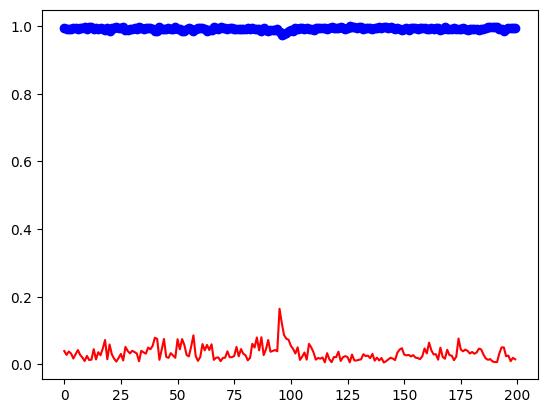

In [40]:
#Increase data
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

aug = ImageDataGenerator(rotation_range=30, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.2], fill_mode="nearest")


#Training
print('Máy tính đang training...')
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=128),
                               epochs=200)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

#Watching charts
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

#Save model
model.save('/content/drive/MyDrive/LanguageDetection/Language.h5')

In [47]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/LanguageDetection/Language.h5')

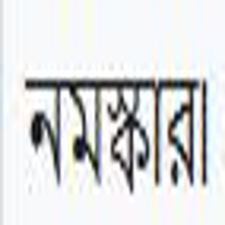

1/1 [==============================] - 0s 18ms/step
['BENGALI']


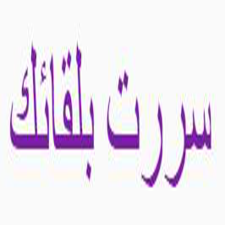

1/1 [==============================] - 0s 17ms/step
['ARABIC']


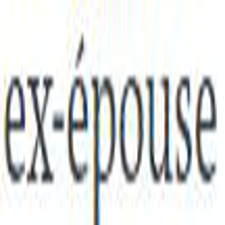

1/1 [==============================] - 0s 19ms/step
['FRENCH']


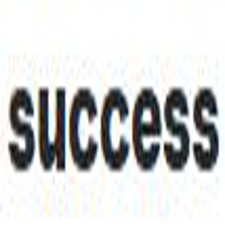

1/1 [==============================] - 0s 18ms/step
['ENGLISH']


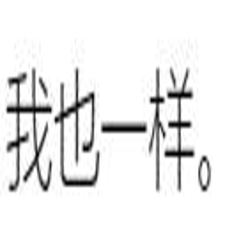

1/1 [==============================] - 0s 22ms/step
['CHINESE']


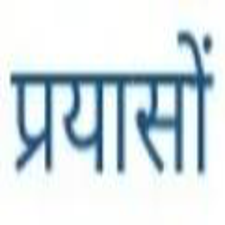

1/1 [==============================] - 0s 19ms/step
['HINDI']


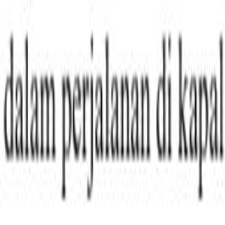

1/1 [==============================] - 0s 19ms/step
['INDONESIAN']


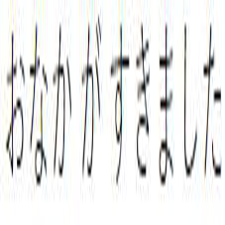

1/1 [==============================] - 0s 19ms/step
['JAPANESE']


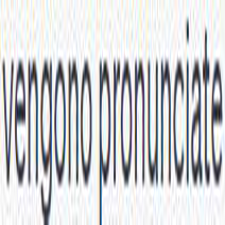

1/1 [==============================] - 0s 18ms/step
['INDONESIAN']


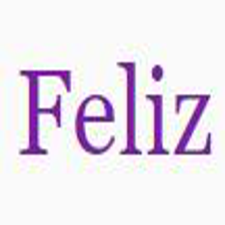

1/1 [==============================] - 0s 19ms/step
['PORTUGAL']


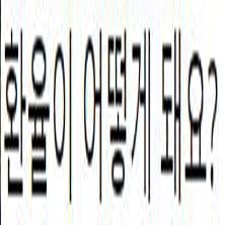

1/1 [==============================] - 0s 25ms/step
['KOREAN']


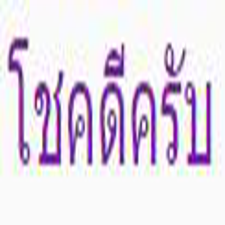

1/1 [==============================] - 0s 19ms/step
['THAILISH']


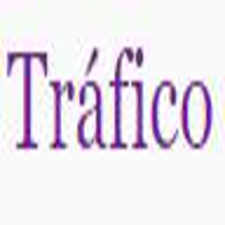

1/1 [==============================] - 0s 19ms/step
['SPANISH']


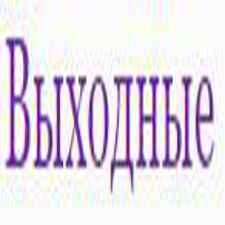

1/1 [==============================] - 0s 19ms/step
['RUSIA']


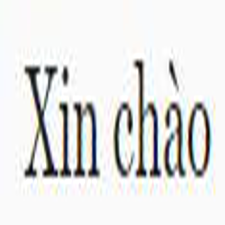

1/1 [==============================] - 0s 26ms/step
['VIETNAMESE']


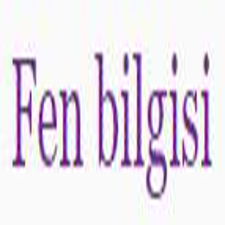

1/1 [==============================] - 0s 20ms/step
['SPANISH']


In [49]:
from PIL import Image
import numpy as np
import os

#Create array to save label
label = np.array(['ARABIC', 'BENGALI', 'CHINESE', 'ENGLISH', 'FRENCH', 'HINDI',
         'INDONESIAN', 'ITALIAN', 'JAPANESE', 'KOREAN', 'PORTUGAL',
         'RUSIA', 'SPANISH', 'THAILISH','TURKISH','VIETNAMESE'])

# New size of photo
new_size = (225, 225)
predict_size = (40, 40)

# The path to the folder containing the photos in Drive
path = '/content/drive/MyDrive/LanguageDetection/Test data language/'
images = os.listdir(path)

# Read photos from folders on Drive and display them on Colab
for image_name in images:
    # Path to image file
    img_path = os.path.join(path, image_name)
    # Read pictures
    if os.path.isfile(img_path):
      # Read pictures
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize photo to new size
      img_origin = img.resize(new_size)
      img_origin.show()

      #Forecast
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,40,40,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])